In [1]:
import seaborn.objects as so
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from dbgsom.dbgsom_ import DBGSOM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits

In [2]:
digits_X, digits_y = load_digits(return_X_y=True)
som = DBGSOM(
    spreading_factor=0.75,
    convergence_iter=10,
    sigma_end=0.8,
    max_iter=200,
    random_state=42,
)

scaler = StandardScaler()

pipe = Pipeline(
    steps=[
        ("scaler", scaler),
        ("som", som),
    ]
)

pipe.fit(digits_X, digits_y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('som',
                 DBGSOM(convergence_iter=10, random_state=42, sigma_end=0.8,
                        spreading_factor=0.75))])

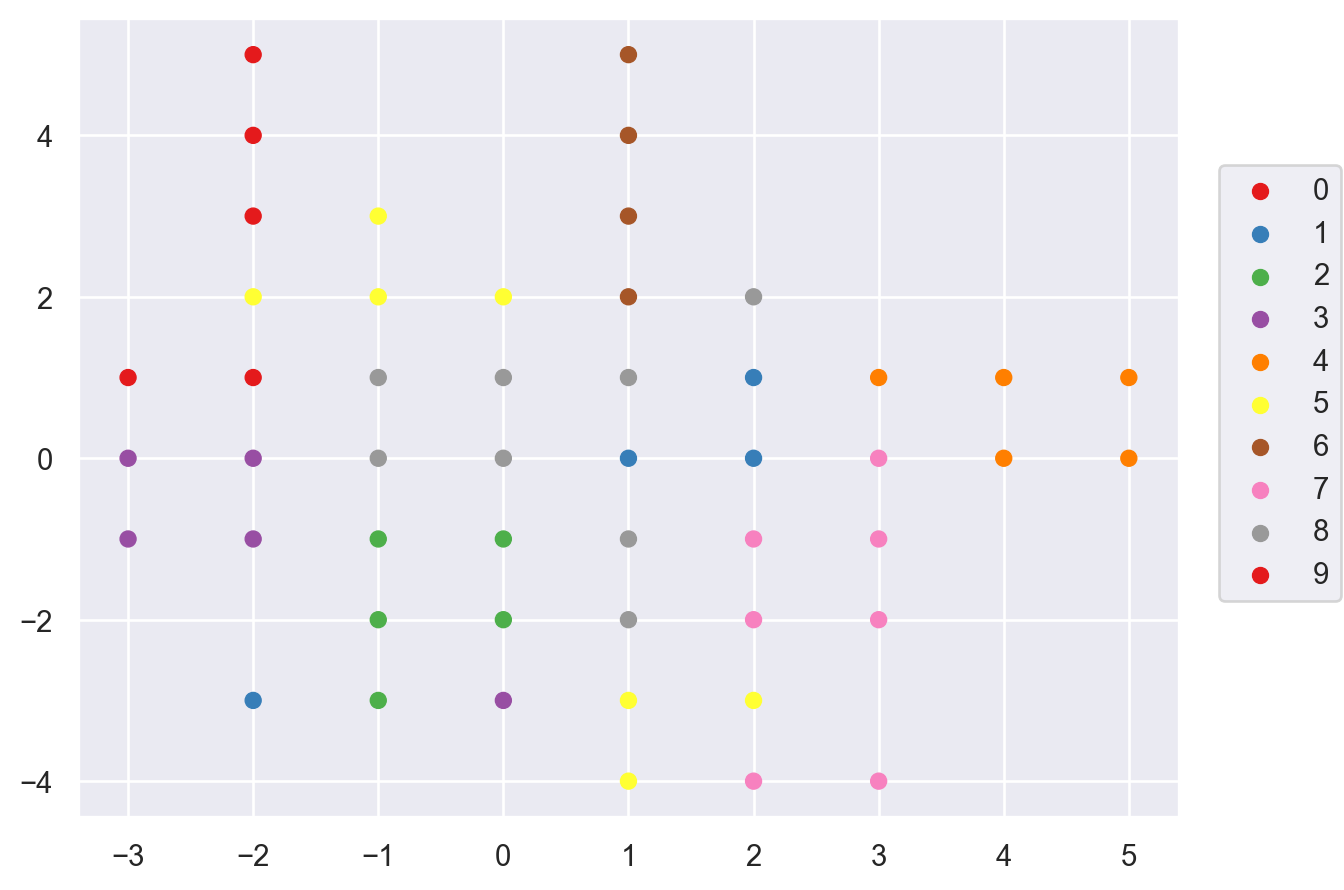

<Figure size 1500x1500 with 0 Axes>

In [3]:
f = plt.figure(figsize=(5, 5), dpi=300)
labels = list(dict(som.som_.nodes.data("label")).values())
coordinates = np.array(som.neurons_)

p = so.Plot(x=coordinates[:,0], y=coordinates[:,1], color=labels).add(so.Dot()).scale(color="Set1")
p.save("digits_classes.png", dpi=300,bbox_inches="tight")

In [4]:
som.predict_proba(digits_X)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.9302326 , 0.        , ..., 0.        , 0.06976745,
        0.        ],
       [0.        , 0.9302326 , 0.        , ..., 0.        , 0.06976745,
        0.        ],
       ...,
       [0.        , 0.02702703, 0.05405406, ..., 0.        , 0.8918919 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.6       ,
        0.3       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.6818182 ,
        0.04545455]], dtype=float32)